# Importing AIFC Files in Python

Use the `aifc` module.

In [1]:
import aifc

In [2]:
with aifc.open('108-42.aiff', 'rb') as f:
    params = f.getparams()
    nchannels, sampwidth, framerate, nframes = params[:4]
    
    frames = f.readframes(nframes)

In [3]:
type(frames)

bytes

In [4]:
import numpy as np

samples = np.frombuffer(frames, dtype=np.int16) 
samples = samples.reshape(nframes, nchannels).T
len(samples), len(samples[0])

(16, 3322112)

In [5]:
samples[0]

array([ -2050, -12546, -19458, ...,   9728,   9472,   8960], dtype=int16)

### Example 1: We can visualize audio of channels/players over time

In [6]:
import matplotlib.pyplot as plt

In [7]:
# Choose channel (which violinist) to listen to
channel = 11 
target_range = slice(0,800) # in frames

sample = samples[channel]

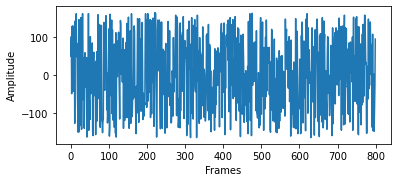

In [8]:
# Plot Results
fig, ax = plt.subplots()

ax.plot(range(len(sample))[target_range], sample[target_range]/200)
ax.set_xlabel('Frames')
ax.set_ylabel('Amplitude')
ax.set_aspect('equal')

### Example 2: Play this back so I know I'm imported the data correctly

In [121]:
import numpy as np
from scipy.io.wavfile import write

In [120]:
# Generate a sample waveform
sampling_rate = framerate
duration = nframes  # seconds
time = np.linspace(0, duration, nframes)
waveform = sample

In [122]:
write('example.wav', sampling_rate, waveform)


# Let's find the pitch the waveform
We can do so via `scipy.fft`

In [9]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Your variables
channel = 3
dt = 1


def interactive_plot(t_i):
    t_f = t_i + dt

    # Converts from seconds to frames
    t_i = int(t_i * framerate)
    t_f = int(t_f * framerate)
    target_range = slice(t_i, t_f)
    sample = samples[channel][target_range]

    # Fast Fourier Transform
    N = len(sample)
    T = 1 / framerate
    fft_data = fft(sample)
    freqs = fftfreq(N, T)

    # Plot Data
    plt.plot(freqs[range(len(fft_data) // 2)], np.abs(fft_data[range(len(fft_data) // 2)]))
    plt.ylim([0,2e7])
    plt.xlim([0,800])
    plt.title(f'FFT at t={t_i/framerate} w/ dt={dt}')
    plt.grid()
    plt.show()

# Create slider for t_i value
t_i_slider = FloatSlider(min=0, max=10, step=0.1, value=1, description='t_i (s)')

# Use the interact function to make the plot interactive
interact(interactive_plot, t_i=t_i_slider)

interactive(children=(FloatSlider(value=1.0, description='t_i (s)', max=10.0), Output()), _dom_classes=('widge…

<function __main__.interactive_plot(t_i)>

# Turns out FFT is for the full wave. We should use STFT 
(Short Time Fourier Transform) is for wave who's frequency is time dependent 

In [10]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [112]:
# VARIABLES
channel = 3
t_i = 2
t_f = 10


# Setup
fs = framerate
target_range = slice(t_i * framerate,t_f * framerate)

x = samples[channel - 1][target_range]

# Run STFT
f, t, Zxx = signal.stft(x, fs, nperseg=35000)
Zxx_db = 20 * np.log10(np.abs(Zxx))

In [118]:
Zxx_db.min(), Zxx_db.max(), Zxx_db.mean()

(-23.25462, 55.883503, 38.866)

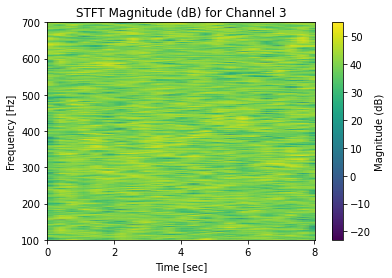

In [119]:
# Plot
plt.pcolormesh(t, f, Zxx_db, vmin=-23, vmax=55, shading='gouraud')
plt.ylim([100,700])
plt.title(f'STFT Magnitude (dB) for Channel {channel}')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar().set_label('Magnitude (dB)')
plt.savefig('test.png', dpi=400)

In [115]:
Zxx_db.min()

-23.25462